In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import math


from utilities_ex import *
from implementations_ex import *

warnings.filterwarnings("ignore")
pd.set_option("display.precision", 1)

In [2]:
data = pd.read_csv("../Data/train.csv")
data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.5,51.7,97.8,28.0,0.9,124.7,2.7,3.1,...,-2.8e-01,258.7,2,67.4,2.1,0.4,46.1,1.2,-2.5,113.5
1,100001,b,160.9,68.8,103.2,48.1,-999.0,-999.0,-999.0,3.5,...,-1.9e+00,164.5,1,46.2,0.7,1.2,-999.0,-999.0,-999.0,46.2
2,100002,b,-999.0,162.2,126.0,35.6,-999.0,-999.0,-999.0,3.1,...,-2.2e+00,260.4,1,44.3,2.1,-2.0,-999.0,-999.0,-999.0,44.3
3,100003,b,143.9,81.4,80.9,0.4,-999.0,-999.0,-999.0,3.3,...,6.0e-02,86.1,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
4,100004,b,175.9,16.9,134.8,16.4,-999.0,-999.0,-999.0,3.9,...,-8.7e-01,53.1,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


In [3]:
data["PRI_jet_num"].value_counts()

0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64

In [4]:
data.shape

(250000, 32)

In [5]:
# how many b and s
data.groupby(['Prediction'])["Id"].count()

Prediction
b    164333
s     85667
Name: Id, dtype: int64

Finds: background are twice as much as signal

In [6]:
# check missing data
data.groupby(['Prediction']).apply(lambda x: (x == -999).sum())

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Prediction,,,,,,,,,,,,,,,,,,,,,
b,0,0,35279,0,0,0,124255,124255,124255,0,...,0,0,0,74421,74421,74421,124255,124255,124255,0
s,0,0,2835,0,0,0,53202,53202,53202,0,...,0,0,0,25492,25492,25492,53202,53202,53202,0


Finds: It seems that data are missing at random-->similar proportion of data for b and s are missing

In [7]:
test_data = pd.read_csv("../Data/test.csv")

In [8]:
test_data.shape

(568238, 32)

In [9]:
test_data.groupby(['Prediction']).apply(lambda x: (x == -999).sum())

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Prediction,,,,,,,,,,,,,,,,,,,,,
?,0,0,86488,0,0,0,402796,402796,402796,0,...,0,0,0,227458,227458,227458,402796,402796,402796,0


Finds: In testing set, possible missing data in same columns as training dataset

In [3]:
# check average
data_replace = data.replace(-999, np.nan) # first replace -999 as NaN
data_replace.groupby(['Prediction']).apply(lambda x: x.mean())

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Prediction,,,,,,,,,,,,,,,,,,,,,
b,224882.4,121.3,58.2,81.6,49.0,1.9,258.4,0.1,2.4,19.2,...,-2.0e-02,197.4,0.9,79.4,-3.7e-03,-1.2e-02,58.3,-1.4e-02,8.7e-03,63.6
s,225224.2,122.7,32.0,80.4,74.9,3.0,511.7,-2.0,2.4,18.4,...,8.6e-03,233.5,1.2,92.9,-2.6e-03,-1.3e-02,56.9,-9.1e-03,-1.4e-02,91.3


Text(0, 0.6, 'Density')

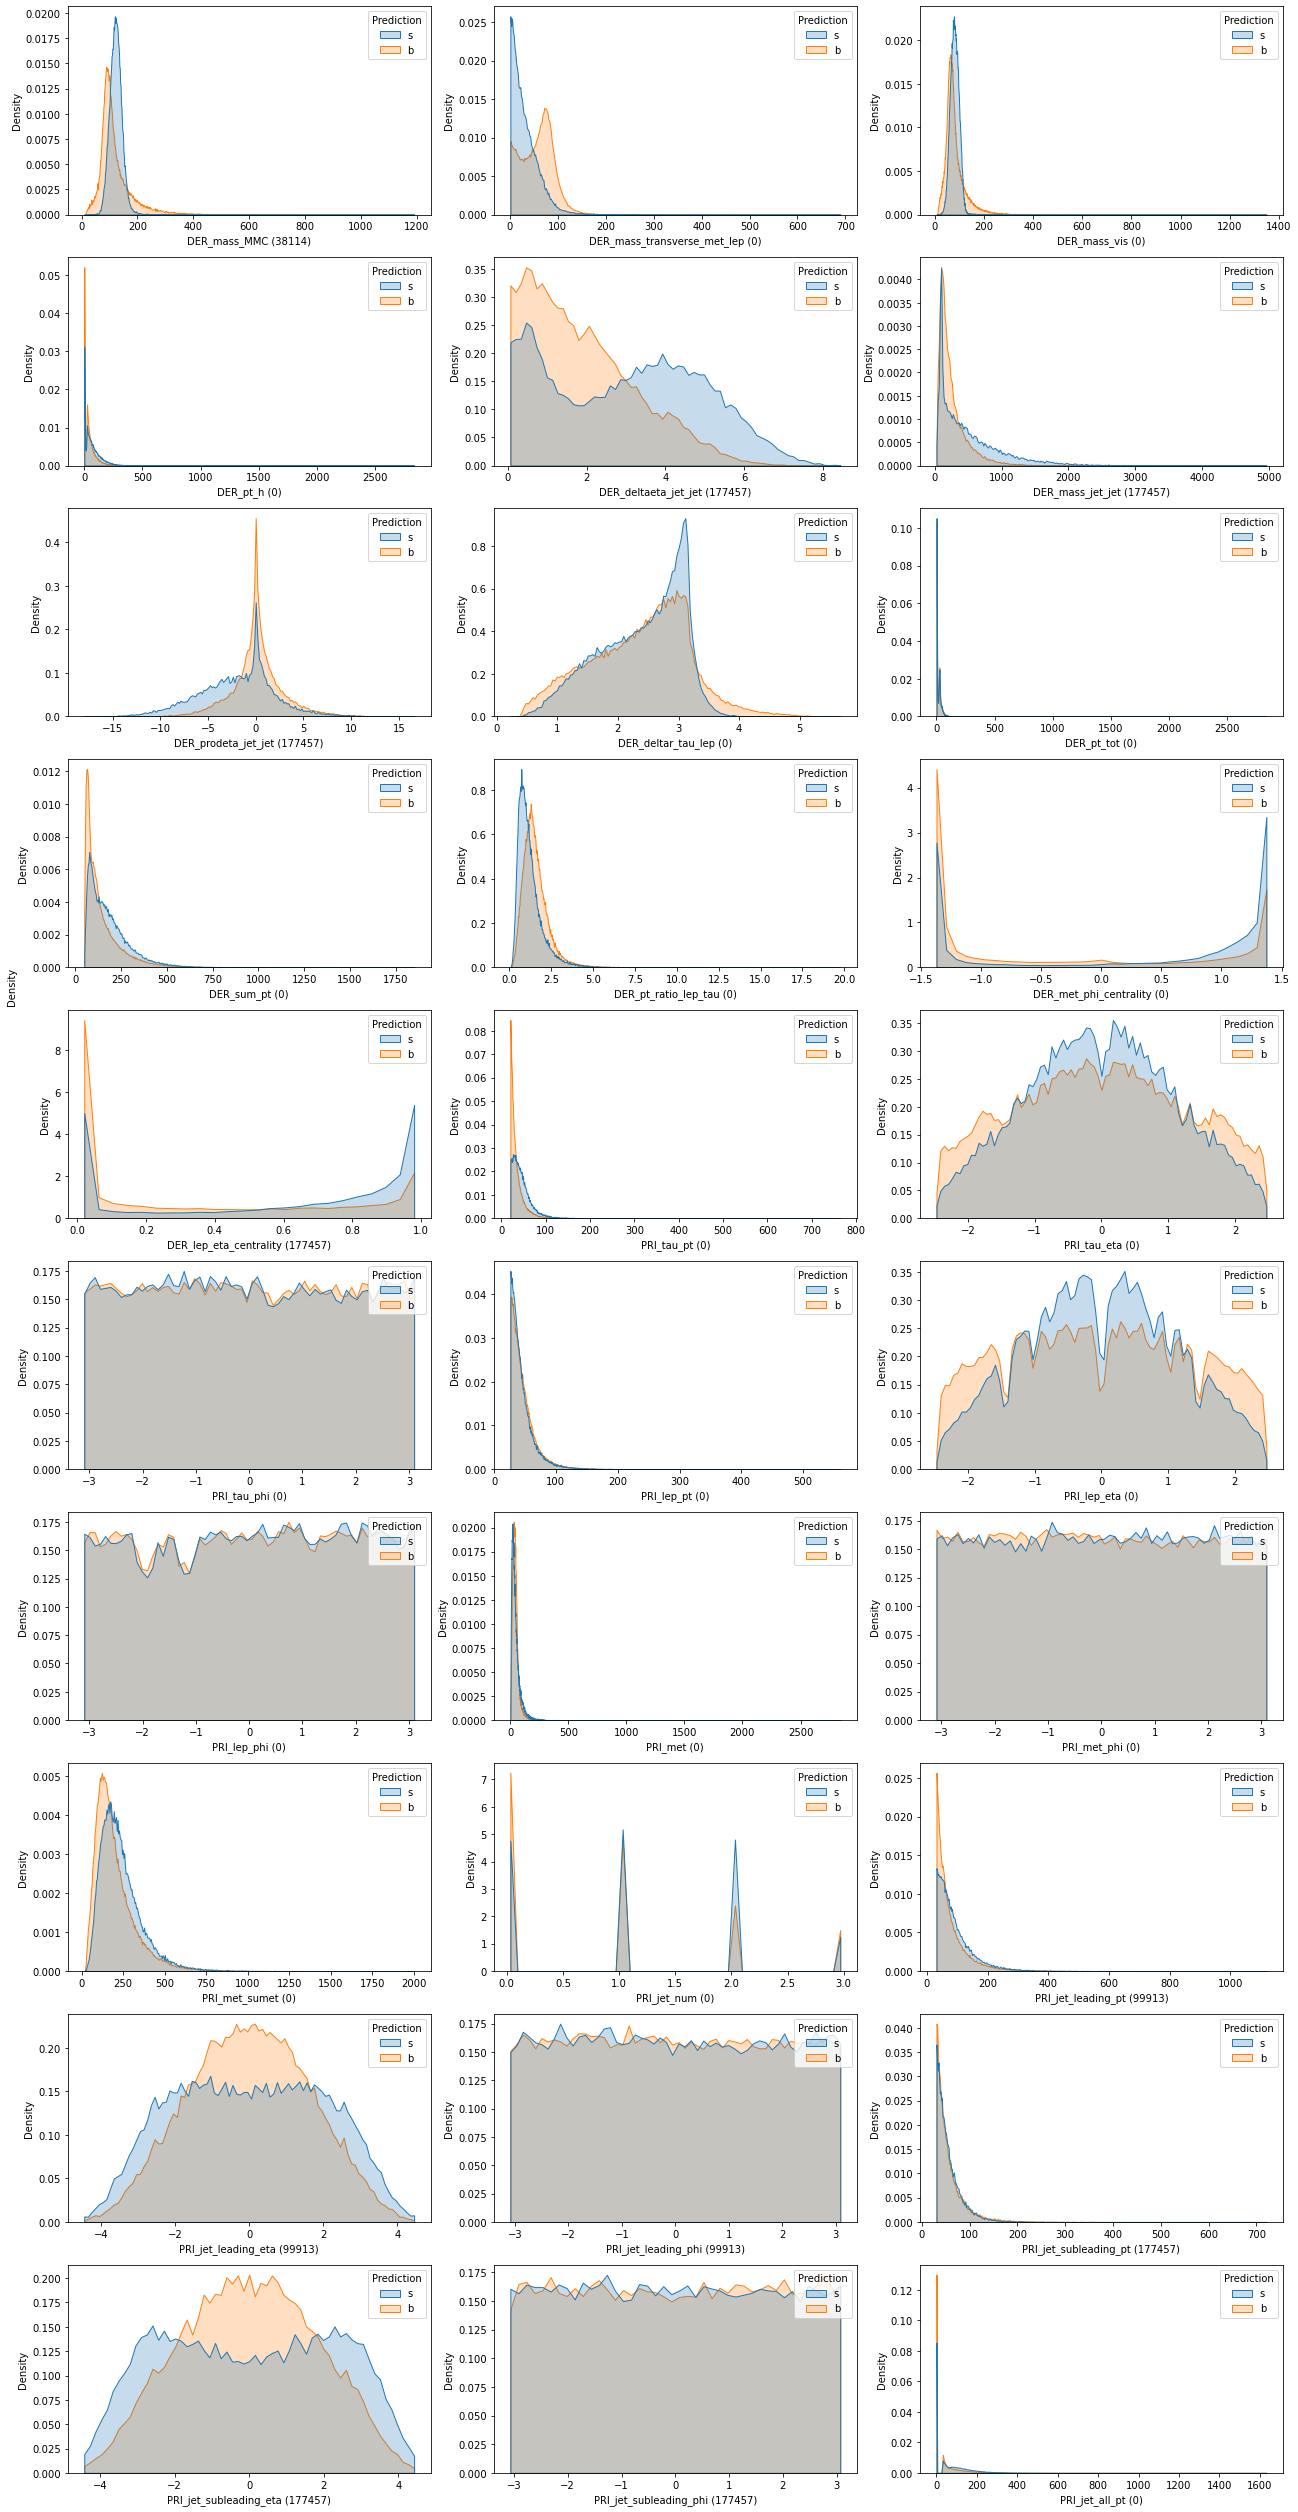

In [11]:
# check histograph (density) of each feature
col_names = data_replace.columns.to_list()[2:]
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(18,35)) 
# draw
for i, col in enumerate(col_names):
    axis = axes[int(i / 3), i % 3]
    NA_num = data_replace[col].isna().sum()
    sns.histplot(data = data_replace, x = col, stat = "density", hue = "Prediction", ax = axis, element = "poly", common_norm = False)
    axis.set_xlabel(col + " (" + str(NA_num) + ")")
fig.tight_layout()
fig.text(0,0.6, "Density", rotation = 90)

proposal 1:
- Keep DER_mass_MMC feature, drop NA records (because the number of missing value in this column is not so much, only 38114)
- drop DER_deltaeta_jet_jet (not sure), DER_mass_jet_jet, DER_prodeta_jet_jet, DER_lep_eta_centrality, PRI_jet_leading_pt, PRI_jet_leading_eta (not sure), PRI_jet_leading_phi, PRI_jet_subleading_pt, PRI_jet_subleading_eta (not sure), PRI_jet_subleading_phi

proposal 2:
- replace all missing value with **mean** of the feature 

proposal 3:
- replace all missing value with **medain** of the feature

proposal 4:
- replace all missing value with randomly sampling form the feature
   
proposal 5:
- do regression to predict the missing value


----------
#### proposal 1:


In [4]:
data_pro1 = data_replace.drop(["DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_lep_eta_centrality", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi"], axis=1)
data_pro1 = data_pro1.dropna()
data_pro1.shape
# (250000, 32)-->(211886, 22)

(211886, 22)

In [5]:
data_pro1.groupby(["Prediction"]).apply(lambda x: x.isna().sum())

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
Prediction,,,,,,,,,,,,,,,,,,,,,
b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Firstly we train basic model to check feature importance

In [31]:
x = np.array(data_pro1.drop(["Id", "Prediction"], axis=1))
y = np.array(data_pro1["Prediction"].replace(["s", "b"], [1, 0]))
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr, col=18)
dummies_va = get_dummy(x_va, col=18)
# data preprocessing
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, col=18, test=False, poly=False, interaction=False)
x_va, _, _ = preprocessing(x_va, dummies_va, col=18, test=True, mean=x_mean, std=x_std, poly=False, interaction=False) 

The 100 of the 100 GD iters has the lowest val loss: loss(train)=0.09533816115423623, loss(val)=0.09512735324038005


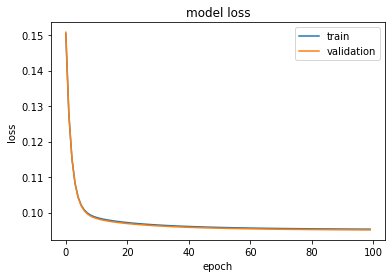

The Accuracy is: 0.7095


In [33]:
# train with linear regression
initial_w = np.zeros(x_tr.shape[1])
best_weights, train_losses, val_losses =  mean_squared_error_gd(y_tr, x_tr, initial_w, y_va, x_va, max_iters=100, gamma=0.2, decay=0, lambda_=0)
# plot
plot_loss(train_losses, val_losses)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

Text(0.5, 0, 'Coefficients')

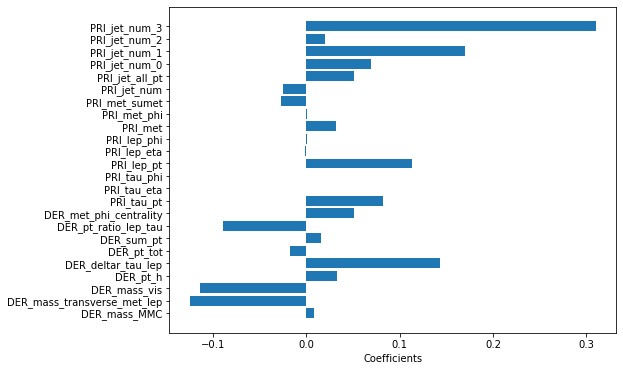

In [34]:
# plot coefficients
y_pos = np.arange(len(best_weights))
labels = data_pro1.drop(["Id", "Prediction"], axis=1).columns.to_list()
labels.extend(["PRI_jet_num_0","PRI_jet_num_1","PRI_jet_num_2","PRI_jet_num_3"])
plt.figure(figsize=(8,6))
plt.barh(y_pos, best_weights, align='center')
plt.yticks(y_pos, labels=labels)
plt.xlabel('Coefficients')

Now we add polynomials and interactions

In [29]:
x = np.array(data_pro1.drop(["Id", "Prediction"], axis=1))
y = np.array(data_pro1["Prediction"].replace(["s", "b"], [1, 0]))
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr, col=18)
dummies_va = get_dummy(x_va, col=18)
# data preprocessing
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, col=18, test=False, poly=True, degree=11, interaction=True)
x_va, _, _ = preprocessing(x_va, dummies_va, col=18, test=True, mean=x_mean, std=x_std, poly=True, degree=11, interaction=True) 

In [30]:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.0736506541272259
The Accuracy is: 0.7995


-------
##### proposal 2:
- replace all missing value with **mean** of the feature 


In [16]:
data_replace_mean = data_replace.copy(deep = True)
data_replace_mean.fillna(data_replace_mean.mean(), inplace=True)
data_replace_mean.shape

(250000, 32)

Text(0, 0.6, 'Density')

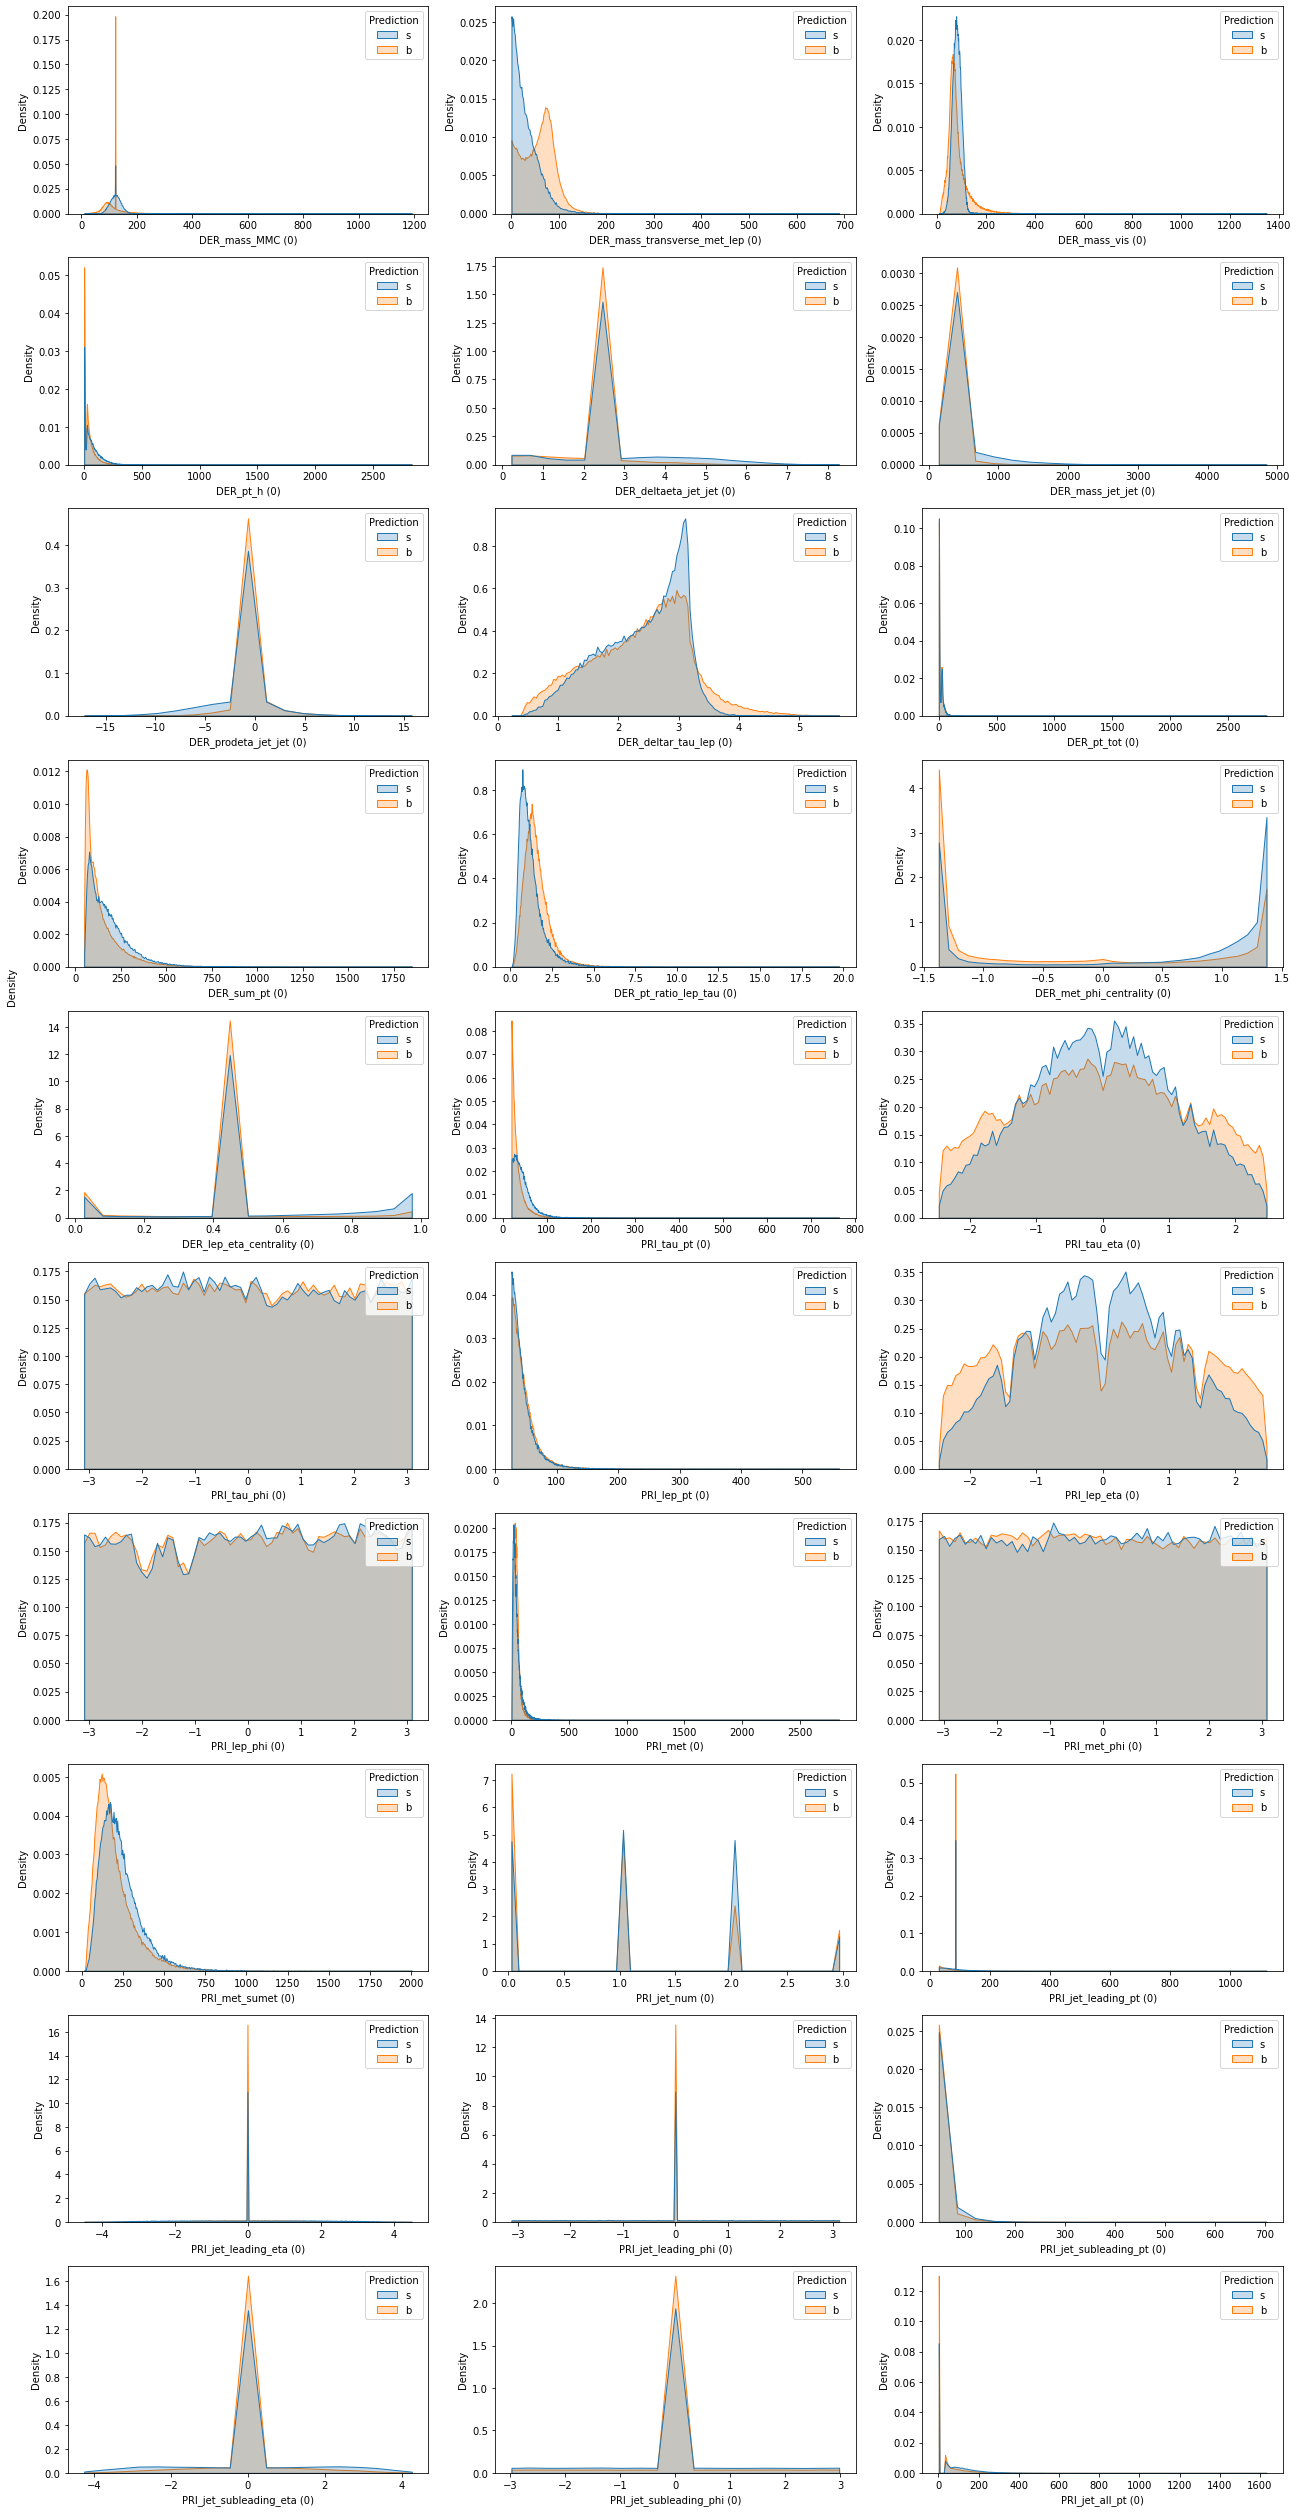

In [17]:
# check histograph (density) of each feature
col_names = data_replace_mean.columns.to_list()[2:]
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(18,35)) 
# draw
for i, col in enumerate(col_names):
    axis = axes[int(i / 3), i % 3]
    NA_num = data_replace_mean[col].isna().sum()
    sns.histplot(data = data_replace_mean, x = col, stat = "density", hue = "Prediction", ax = axis, element = "poly", common_norm = False)
    axis.set_xlabel(col + " (" + str(NA_num) + ")")
fig.tight_layout()
fig.text(0,0.6, "Density", rotation = 90)

In [18]:
x = np.array(data_replace_mean.drop(["Id", "Prediction"], axis=1))
y = np.array(data_replace_mean["Prediction"].replace(["s", "b"], [1, 0]))
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr, col=18)
dummies_va = get_dummy(x_va, col=18)
# data preprocessing
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, col=18, test=False, poly=True, degree=11, interaction=True)
x_va, _, _ = preprocessing(x_va, dummies_va, col=18, test=True, mean=x_mean, std=x_std, poly=True, degree=11, interaction=True) 

In [19]:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.06512015072131755
The Accuracy is: 0.8234


We get better results than dropping features

-------
##### proposal 3:
- replace all missing value with **median** of the feature 


In [20]:
data_replace_median = data_replace.copy(deep = True)
data_replace_median.fillna(data_replace_median.median(), inplace=True)
data_replace_median.shape

(250000, 32)

In [21]:
x = np.array(data_replace_median.drop(["Id", "Prediction"], axis=1))
y = np.array(data_replace_median["Prediction"].replace(["s", "b"], [1, 0]))
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr, col=18)
dummies_va = get_dummy(x_va, col=18)
# data preprocessing
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, col=18, test=False, poly=True, degree=11, interaction=True)
x_va, _, _ = preprocessing(x_va, dummies_va, col=18, test=True, mean=x_mean, std=x_std, poly=True, degree=11, interaction=True) 

In [22]:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.3076619222146983
The Accuracy is: 0.6877


taking median is worse than taking mean

-------
##### proposal 4:
- replace all missing value with random sampling from that column


In [23]:
# randomly sample from existing values;
data_replace_random = data_replace.copy(deep = True)
col_names = data_replace_random.columns.to_list()[2:]
for col in col_names:
    data_replace_random.loc[data_replace_random[col].isna(), col] = data_replace_random[col].dropna().sample(data_replace_random[col].isna().sum(), replace = True, random_state = 1).values
data_replace_random.shape

(250000, 32)

Text(0, 0.6, 'Density')

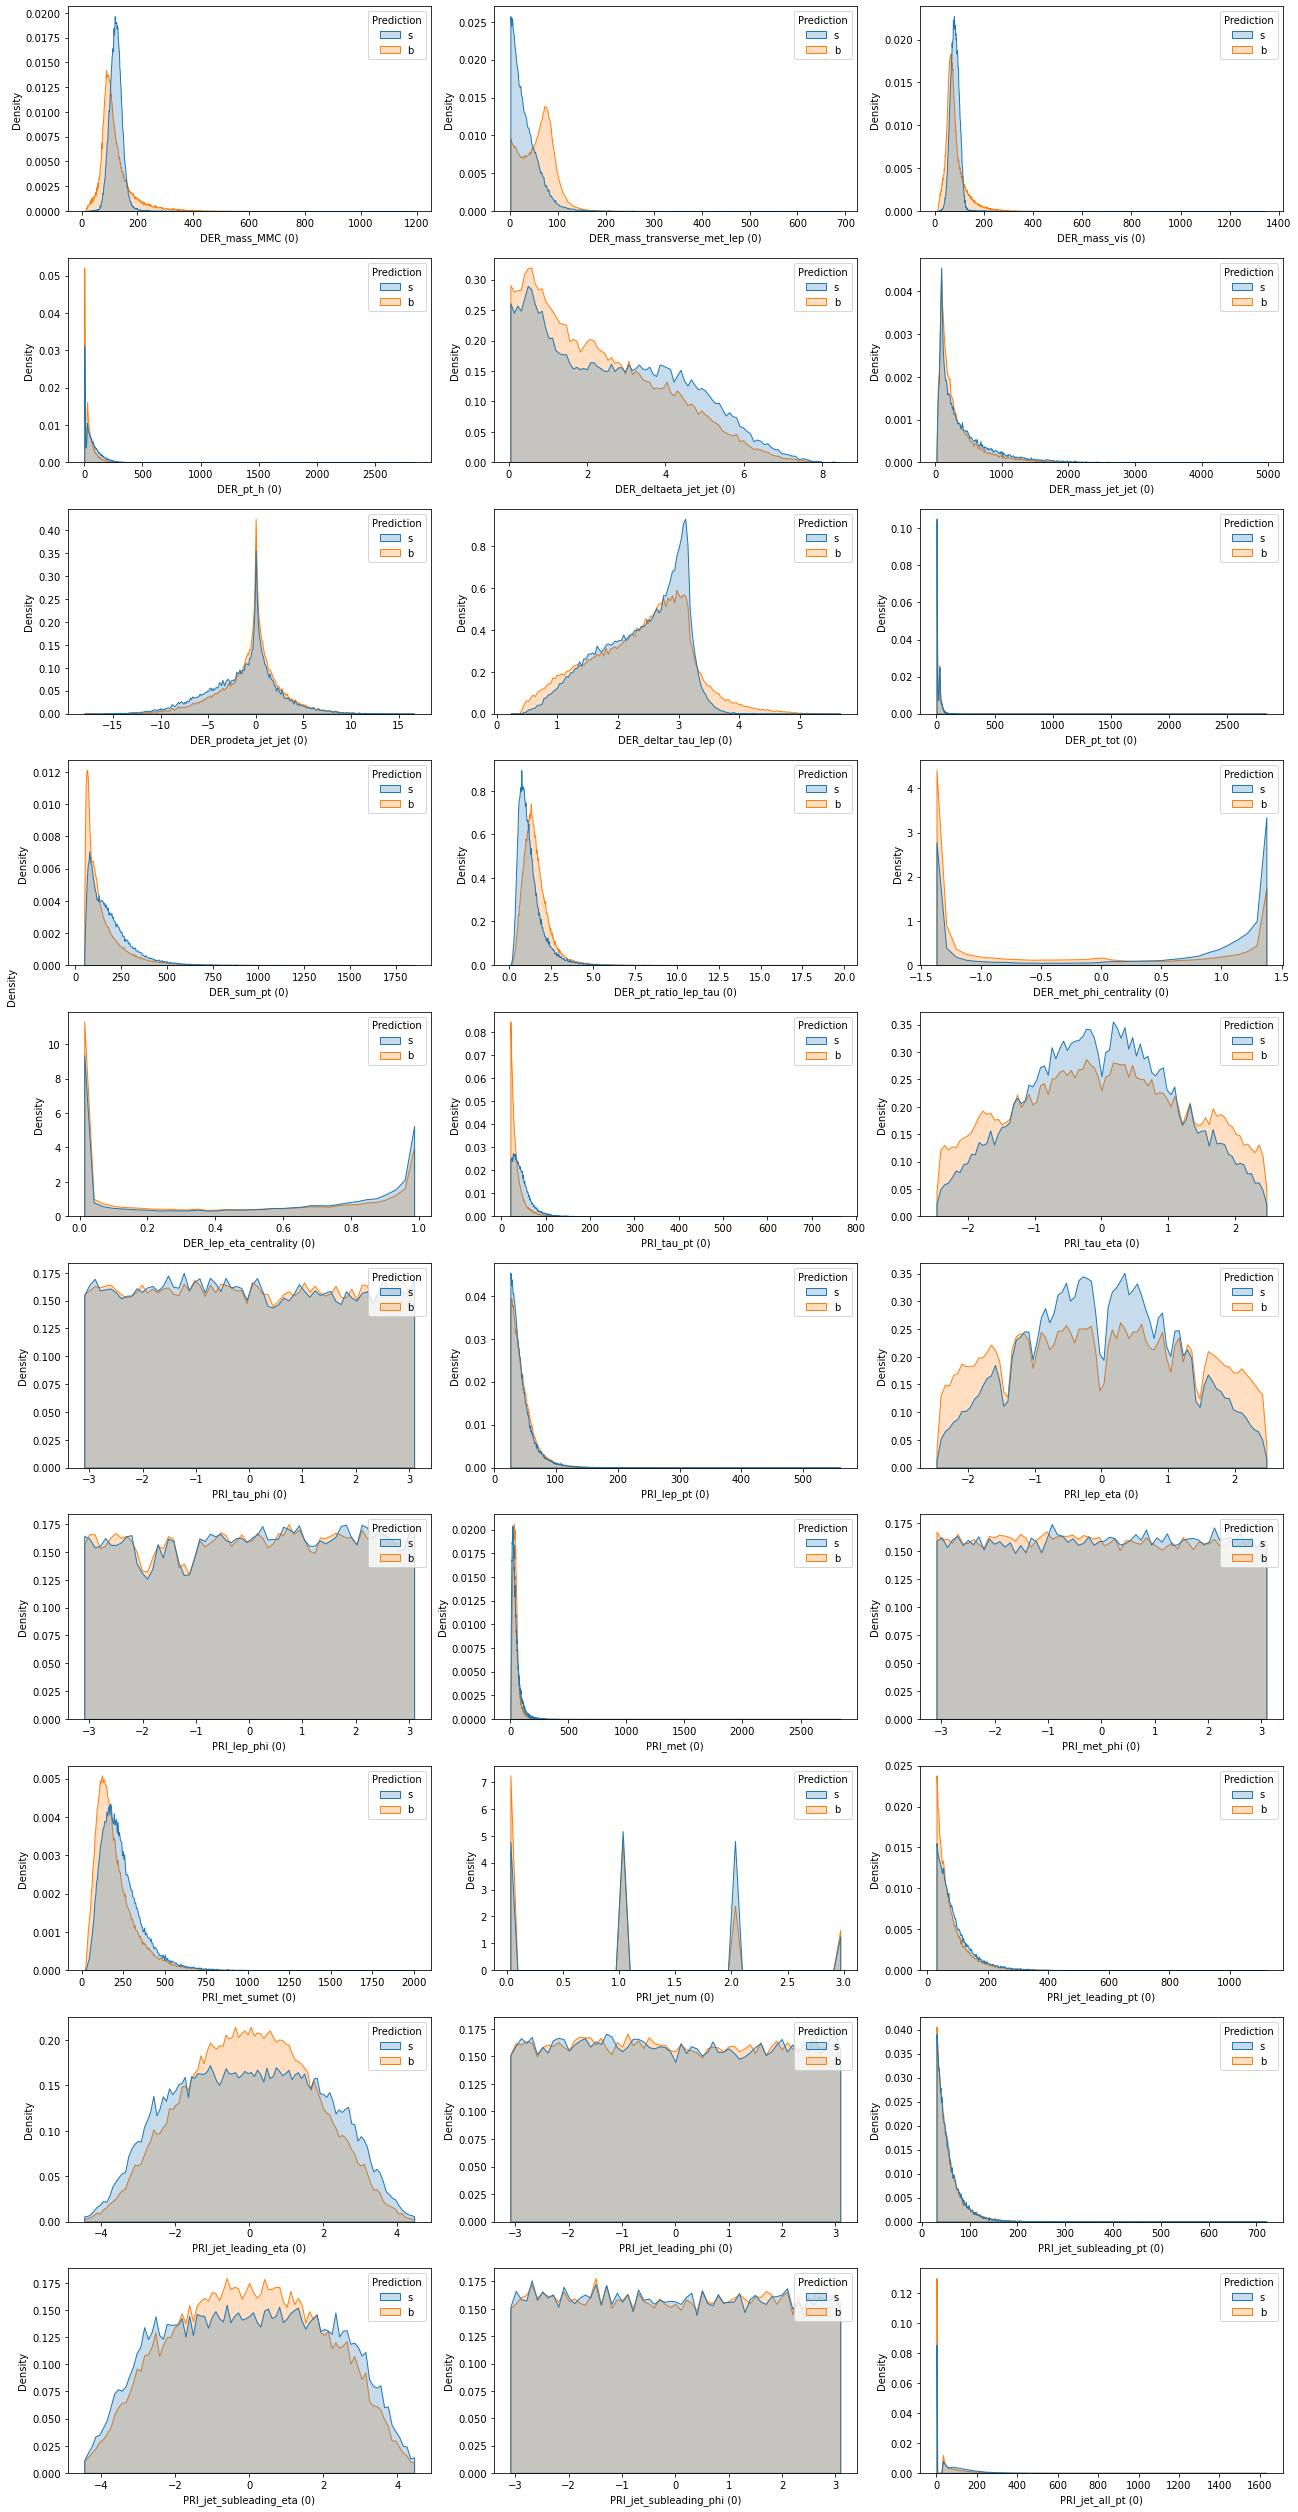

In [24]:
# check histograph (density) of each feature
col_names = data_replace_random.columns.to_list()[2:]
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(18,35)) 
# draw
for i, col in enumerate(col_names):
    axis = axes[int(i / 3), i % 3]
    NA_num = data_replace_random[col].isna().sum()
    sns.histplot(data = data_replace_random, x = col, stat = "density", hue = "Prediction", ax = axis, element = "poly", common_norm = False)
    axis.set_xlabel(col + " (" + str(NA_num) + ")")
fig.tight_layout()
fig.text(0,0.6, "Density", rotation = 90)

In [26]:
x = np.array(data_replace_random.drop(["Id", "Prediction"], axis=1))
y = np.array(data_replace_random["Prediction"].replace(["s", "b"], [1, 0]))
x_tr, x_va, y_tr, y_va = split_data(x, y, ratio=0.8, seed=1) # split data into training set and validation set
# one-hot encoding
dummies_tr = get_dummy(x_tr, col=18)
dummies_va = get_dummy(x_va, col=18)
# data preprocessing
x_tr, x_mean, x_std = preprocessing(x_tr, dummies_tr, col=18, test=False, poly=True, degree=11, interaction=True)
x_va, _, _ = preprocessing(x_va, dummies_va, col=18, test=True, mean=x_mean, std=x_std, poly=True, degree=11, interaction=True) 

In [27]:
best_weights, mse = least_squares(y_tr, x_tr)
print(mse)
# accuracy on validation set
predict_acc(x_va, y_va, best_weights, logistic=False)

0.08938634072744045
The Accuracy is: 0.7815


random sapling is worse than taking mean

---------
#### proposal 5: Outlook
we could also do regression to predict the missing value

### Conclusions: the best method is to replace missing value with mean